In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
#filepath = os.path.join("data", "city_data.csv")
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

# Display the data table for preview


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
pyber_df= pd.merge(city_data_df, ride_data_df, on="city")
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
pyber2_df = pyber_df.copy()
pyber2_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
pyber3_df = pyber_df.copy()
pyber3_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
pyber4_df = pyber_df.copy()
pyber4_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city type

In [8]:
#find the city types
city_types = pyber_df.type.unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
total_rides_city_df = pyber_df.groupby(['city',]).agg({'ride_id': 'count'})
total_rides_city_df.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [10]:
total_rides_city_df['total_rides_city'] = total_rides_city_df['ride_id']
total_rides_city_df.head()

,ride_id,total_rides_city
city,,
Amandaburgh,18,18
Barajasview,22,22
Barronchester,16,16
Bethanyland,18,18
Bradshawfurt,10,10


In [11]:
total_rides_city_df = total_rides_city_df.drop(['ride_id'],1)
total_rides_city_df.head()

,total_rides_city
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [12]:
enriched_pyber_df= pd.merge(pyber_df, total_rides_city_df, on="city")
enriched_pyber_df.head()

,city,driver_count,type,date,fare,ride_id,total_rides_city
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794,28
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494,28
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416,28
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413,28
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850,28


In [13]:
avg_fare_city_df = pyber_df.groupby(['city',]).agg({'fare': 'mean'})
avg_fare_city_df.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [14]:
avg_fare_city_df['avg_fare'] = avg_fare_city_df['fare']
avg_fare_city_df.head()

,fare,avg_fare
city,,
Amandaburgh,24.641667,24.641667
Barajasview,25.332273,25.332273
Barronchester,36.422500,36.422500
Bethanyland,32.956111,32.956111
Bradshawfurt,40.064000,40.064000


In [15]:
avg_fare_city_df = avg_fare_city_df.drop(['fare'],1)
avg_fare_city_df.head()

,avg_fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [16]:
enriched_pyber_df = enriched_pyber_df.drop(['ride_id', 'date'],1)
enriched_pyber_df.head()

,city,driver_count,type,fare,total_rides_city
0,Richardfort,38,Urban,13.93,28
1,Richardfort,38,Urban,14.00,28
2,Richardfort,38,Urban,17.92,28
3,Richardfort,38,Urban,10.26,28
4,Richardfort,38,Urban,23.00,28


In [17]:
scatter_pyber_df= pd.merge(enriched_pyber_df, avg_fare_city_df, on="city")
scatter_pyber_df.head()

,city,driver_count,type,fare,total_rides_city,avg_fare
0,Richardfort,38,Urban,13.93,28,22.373214
1,Richardfort,38,Urban,14.00,28,22.373214
2,Richardfort,38,Urban,17.92,28,22.373214
3,Richardfort,38,Urban,10.26,28,22.373214
4,Richardfort,38,Urban,23.00,28,22.373214


In [18]:
scatter_pyber_df = scatter_pyber_df.drop(['fare'],1)
scatter_pyber_df.head()

,city,driver_count,type,total_rides_city,avg_fare
0,Richardfort,38,Urban,28,22.373214
1,Richardfort,38,Urban,28,22.373214
2,Richardfort,38,Urban,28,22.373214
3,Richardfort,38,Urban,28,22.373214
4,Richardfort,38,Urban,28,22.373214


In [19]:
colors  = {"Urban":"red", "Suburban":"blue", "Rural":"grey"}
color_list = [colors[city_type] for city_type in scatter_pyber_df.type]
print(color_list)


['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'

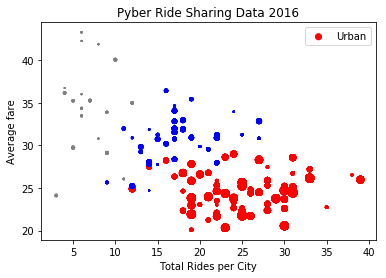

In [35]:
# Show plot
pyber_scatter = plt.scatter(scatter_pyber_df.total_rides_city, scatter_pyber_df.avg_fare, s=scatter_pyber_df.driver_count, c=color_list)
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Rides per City")
plt.ylabel("Average fare")
labels = []
for item in items:
    label = item[0]
    plt.plot(item[1][0], item[1][1], 'o', c=colors[item], label=str(label))
plt.legend()


## Total Fares by City Type

In [21]:
# Calculate Type Percents
total_fares = pyber_df['fare'].sum()
total_fares





63538.64

In [22]:
city_type_total_df = pyber2_df.drop(['driver_count', 'ride_id', 'date', 'city'], 1)
city_type_total_df.head()

,type,fare
0,Urban,13.93
1,Urban,14.00
2,Urban,17.92
3,Urban,10.26
4,Urban,23.00


In [23]:
city_type_fare_df = city_type_total_df.groupby('type').agg({'fare': 'sum'})
city_type_fare_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [24]:
city_type_fare_df["percentage"] = city_type_fare_df['fare'] / total_fares *100
city_type_fare_df

,fare,percentage
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


In [25]:
city_type_fare_df = city_type_fare_df.drop(['fare'],1)
city_type_fare_df

,percentage
type,
Rural,6.811493
Suburban,30.463872
Urban,62.724635


<function matplotlib.pyplot.show(*args, **kw)>

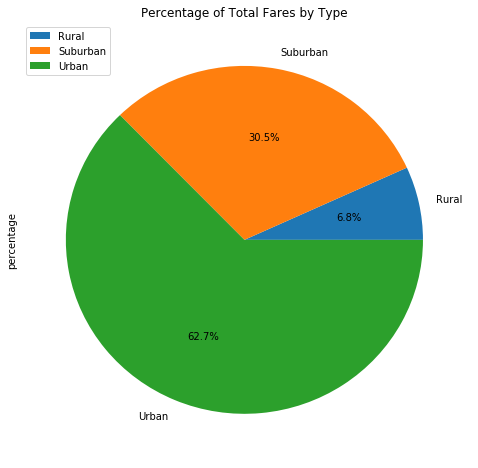

In [26]:
# Build Pie Chart
# Show Figure
fig_perc = city_type_fare_df.plot.pie(subplots=True,autopct='%1.1f%%', figsize = (8,8))
plt.title('Percentage of Total Fares by Type')
plt.show

In [27]:
# Save Figure
plt.savefig('fig_perc.png')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [28]:
# Calculate Ride Percents
total_rides = len(pyber2_df['ride_id'])
total_rides





2375

In [29]:
city_type_rides_df = pyber3_df.drop(['driver_count', 'fare', 'date', 'city'], 1)
city_type_rides_df.head()

,type,ride_id
0,Urban,5628545007794
1,Urban,910050116494
2,Urban,820639054416
3,Urban,9554935945413
4,Urban,720020655850


In [30]:
city_type_rides_df = pyber3_df.groupby('type').agg({'ride_id': 'count'})
city_type_rides_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [31]:
city_type_rides_df["percentage"] = city_type_rides_df['ride_id'] / 2375 *100
city_type_rides_df

,ride_id,percentage
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


In [32]:
city_type_rides_df = city_type_rides_df.drop(['ride_id'],1)
city_type_rides_df

,percentage
type,
Rural,5.263158
Suburban,26.315789
Urban,68.421053


<function matplotlib.pyplot.show(*args, **kw)>

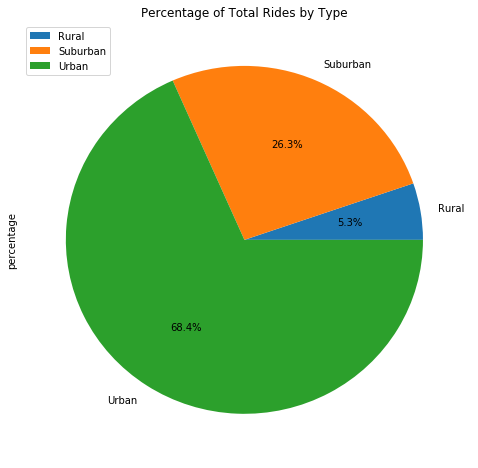

In [33]:
# Build Pie Chart
# Show Figure
fig_perc_rides = city_type_rides_df.plot.pie(subplots=True,autopct='%1.1f%%', figsize = (8,8))
plt.title('Percentage of Total Rides by Type')
plt.show

In [34]:
# Save Figure
plt.savefig('fig_perc_rides.png')

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [40]:
# Calculate Driver Percents
total_drivers = city_data_df['driver_count'].sum()
total_drivers






2973

In [42]:
city_type_drivers_df = city_data_df.groupby('type').agg({'driver_count': 'sum'})
city_type_drivers_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [43]:
city_type_drivers_df["percent"] = city_type_drivers_df['driver_count'] / total_drivers * 100
city_type_drivers_df

,driver_count,percent
type,,
Rural,78,2.623613
Suburban,490,16.481668
Urban,2405,80.894719


In [44]:
city_type_drivers_df = city_type_drivers_df.drop(['driver_count'], 1)
city_type_drivers_df

,percent
type,
Rural,2.623613
Suburban,16.481668
Urban,80.894719


<function matplotlib.pyplot.show(*args, **kw)>

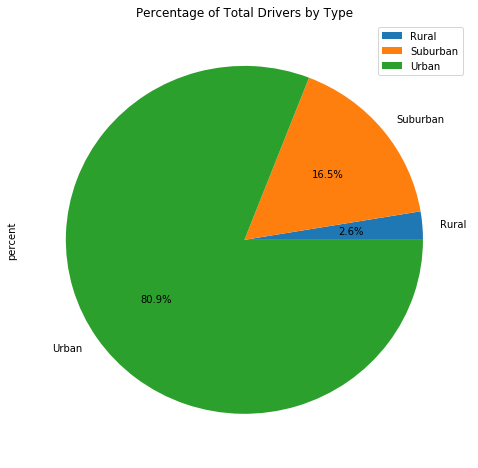

In [45]:

# Build Pie Chart
# Show Figure
fig_perc_drivers = city_type_drivers_df.plot.pie(subplots=True,autopct='%1.1f%%', figsize = (8,8))
plt.title('Percentage of Total Drivers by Type')
plt.show

In [155]:
# Save Figure

plt.savefig('fig_perc_drivers.png')

<Figure size 432x288 with 0 Axes>